In [4]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


### Simulado 6

#### Questão 1

A altura de pessoas de uma determinada comunidade varia segundo um modelo normal. Estima-se que a média é maior ou igual a 168cm. Foi extraída uma amostra de 12 pessoas e as alturas foram as seguintes:

dados = [174.8, 170.5, 172.0, 170.9, 178.1, 179.0, 184.5, 143.0, 171.2, 172.6, 140.4, 165.2]

Existe evidência suficiente de que a estimativa não é verdadeira? Use um nível de significância de 5%

In [22]:
# H0: mu >= 168
# sigma desconhecido
# amostra pequena

significance = 0.05

dados = np.array([174.8, 170.5, 172.0, 170.9, 178.1, 179.0, 184.5, 143.0, 171.2, 172.6, 140.4, 165.2])
n = len(dados)
mu_s = np.mean(dados)
mu_0 = 168
s2 = np.var(dados) * (n/(n-1))
s = np.sqrt(s2)

z = (mu_s - mu_0) / (s / np.sqrt(n))
print(z) # Quanto mu_s está deslocado da média estimada, tomada como H0

pvalor = 1 - sts.t.cdf(z, n-1) # P(X > 168) <-> P(Z > z), com z = media deslocada ^ H0
print(pvalor) # Probabilidade que media seja menor que 168

if (pvalor > significance): print("Rejeitar Ha (alternativa). Aceitar H0 (nula)")
else: print("Aceitar Ha (alternativa). Rejeitar H0 (nula)")


0.13290174269719104
0.44833557161329807
Rejeitar Ha (alternativa). Aceitar H0 (nula)


Seja p-valor probabilidade de ocorrer H0.

Se p-valor pequeno (menor que significância), rejeitamos H0, pois sua probabilidade de ocorrer é baixa. Aceitamos Ha, em consequência

Se p-valor grande (maior que significância), não rejeitamos H0, pois sua probabilidade de ocorrer é alta. Rejeitamos Ha, em consequência

#### Questão 2

A fim de evitar riscos sanitários e corrosões em tubulações, a Companhia de Saneamento básico recomenda que o pH da água nos domicílios esteja na faixa de 6.0 a 9.5. Com o objetivo de estimar a proporção p de domicílios nos quais o pH da água está fora da faixa recomendada, foi coletada uma amostra de água de 2600 domicílios e foram observadas 2482 amostras de água com pH na faixa recomendada. Estima-se que p vale no mínimo 0.04.

Teste a hipótese da afirmação sobre o valor mínimo da proporção. Use um nível de significância de 10%

In [20]:
# H0: p >= 0.04
# Ha: p < 0.04

n = 2600
p = (n - 2482)/n # taxa de sucessos
p0 = 0.04
signif = 0.1

z = (p - p0)/(np.sqrt(p*(1-p)/n))
print(z)

pvalor = 1 - sts.norm.cdf(z,loc=0,scale=1) # P(p >= 0.04) <-> P(Z < z)
print(pvalor)

if (pvalor > signif): print("Rejeitar Ha (alternativa). Aceitar H0 (nula)")
else: print("Aceitar Ha (alternativa). Rejeitar H0 (nula)")


1.3190851082789934
0.09357033054902064
Aceitar Ha (alternativa). Rejeitar H0 (nula)


#### Questão 3

Uma transportadora de mercadorias tem duas possibilidades de trajeto para realizar entregas. O gerente de logística desconfia não haver diferença significativa entre o tempo médio de cada trajeto. Foram selecionadas aleatoriamente 39 entregas realizadas no primeiro trajeto, resultando em uma média amostral de 53 min. No segundo trajeto, foram selecionadas 47 entregas, e o tempo médio foi de 61 min. O desvio padrão populacional do primeiro trajeto é de $\sigma_1 = 7$ min, e do segundo, $\sigma_2 = 9$ min. 

Teste a hipótese de que não existe diferença significativa entre o tempo médio dos dois trajetos, ao nível de 5% de significância

In [30]:
# H0: mu1 = mu2
# Ha: mu1 != mu2
# desvio padrao conhecidos
# amostra grande

mu1_s = 53
n1 = 39
s12 = 7**2

mu2_s = 61
n2 = 47
s22 = 9**2

z = (mu1_s - mu2_s) / (np.sqrt((s12/n1) + (s22/n2)))

print(z)

pvalor = sts.norm.cdf(-abs(z)) + (1 - sts.norm.cdf(abs(z)))
# <-> pvalor = 2 * sts.norm.cdf(-abs(z))

print(pvalor)

signif = 0.05
if (pvalor > signif): print("Rejeitar Ha (alternativa). Aceitar H0 (nula)")
else: print("Aceitar Ha (alternativa). Rejeitar H0 (nula)")

-4.634419806460341
3.579399558777574e-06
Aceitar Ha (alternativa). Rejeitar H0 (nula)


#### Questão 4

Uma pesquisa avaliou a eficácia de dois tipos de terinamento, com a finalidade de reduzir o tempo médio de determinada tarefa doméstica. Foram selecionadas duas amoastras aleatórias de populações com distribuição normal, onde assume-se que $\sigma_1 \neq \sigma_2$. Os dados da pesquisa são

$n_1 = 12, \overline{x}_1 = 42.3, s_1 = 2.27$

$n_2 = 14, \overline{x}_2 = 38.8, s_2 = 3.64$

Teste a hipótese de que o tempo médio para a realização da tarefa é igual para os dois treinamentos.

In [31]:
# H0: mu1 = mu2
# Ha: mu1 != mu2
# desvios padrao conhecidos e diferentes
# amostra grande

"""
  Caso sigmas iguais e X distribuicao normal:
  - (chi^2, com n-1 grau de liberdade)
  q2 = ((n-1)*(s**2))/(sigma0**2)  (estatistica do teste)

  pvalor = sts.chi2.cdf(n-1)
"""

xb1 = 42.3
n1 = 12
s12 = (2.27)**2

xb2 = 38.8
n2 = 14
s22 = (3.64)**2

z = (xb1 - xb2) / np.sqrt((s12 / n1) + (s22 / n2))
print(z)

v = ( (((s12 / n1) + (s22 / n2))**2) / ( (((s12 / n1)**2) / (n1 + 1)) + (((s22 / n2)**2) / (n2 + 1)) ) ) - 2 # graus de liberdade

pvalor = sts.t.cdf(-abs(z), v) + (1 - sts.t.cdf(abs(z), v))
# <-> pvalor = 2 * sts.t.cdf(-abs(z), v)

print(pvalor)

signif = 0.05
if (pvalor > signif): print("Rejeitar Ha (alternativa). Aceitar H0 (nula)")
else: print("Aceitar Ha (alternativa). Rejeitar H0 (nula)")

2.9839330623712166
0.0065174551463041495
Aceitar Ha (alternativa). Rejeitar H0 (nula)


#### Questão 5

Um estudo com 2870 motoristas, 1210 confirmam ter o hábito de mexer no celular com o carro em movimento mesmo havendo uma lei que prevê multa para quem realiza essa ação. Essa lei foi revogada e depois foi realizado ouro estudo com 2200 motoristas, dos quais 1015 afirmaram ter o hábito. 

Usando um nível de significância de 1% e aproximação pela normal, verifique se a alegação de que a proporção de motoristas com hábito de mexer no celular no trânsito aumentou significativamente após a revogação da lei.

In [33]:
# H0: mu1 >= mu2
# Ha: mu1 < mu2
# desvios padrao nao conhecidos
# amostra grande

n1 = 2870
p1_s = 1210 / n1

n2 = 2200
p2_s = 1015 / n2

p_s = (n1*p1_s + n2*p2_s) / (n1 + n2)

z = (p1_s - p2_s) / np.sqrt(p_s * (1 - p_s) * (1/n1 + 1/n2))
print(z)

pvalor = sts.norm.cdf(z,0,1)
print(pvalor)

signif = 0.01
if (pvalor > signif): print("Rejeitar Ha (alternativa). Aceitar H0 (nula)")
else: print("Aceitar Ha (alternativa). Rejeitar H0 (nula)")

-2.8275205732953963
0.0023455000544627238
Aceitar Ha (alternativa). Rejeitar H0 (nula)


### Lista 6

In [ ]:
## probab de obter 60 sucessos numa amostra de 100 elementos, sendo cada elemento uma Bernoulli (p=0.5)
pvalorbinom=1-sss.binom.cdf(60,100,0.5)
print(pvalorbinom)

0.01760010010885238


In [ ]:
##exo 3a
desvioX=10
nn=50
## calculamos o p-valor de H0 e de Ha (mas o de Ha não se usa)
pvalorH0=sss.norm.cdf(15.2,18,desvioX/np.sqrt(nn))
pvalorHa=1-sss.norm.cdf(15.2,13,desvioX/np.sqrt(nn))
print(pvalorH0,pvalorHa)

0.02385744011867555 0.05989746521295913


In [ ]:
## caso bilateral (Ha é que mu é distinto de 18)
pvalorbil=sss.norm.cdf(15.2,18,desvioX/np.sqrt(nn))+1-sss.norm.cdf(20.8,18,desvioX/np.sqrt(nn))
print(pvalorbil)

0.04771488023735104


In [ ]:
## peso medio de 50 passageiros é 200,
## queremos testar a hipótese de que o peso médio populacional é 195, com variancia de 100
## isto é um "z-test"
## unilateral: testar se aumentou
pvalornormal=1-sss.norm.cdf(200,195,np.sqrt(100/50))
print(pvalornormal)
#bilateral
pvalornormalbil=1-sss.norm.cdf(200,195,np.sqrt(100/50))+sss.norm.cdf(190,195,np.sqrt(100/50))
print(pvalornormalbil)

0.00020347600872250293
0.00040695201744498234


Proporção do rebanho com verminose.

In [ ]:
## p-valor
## isto aquií é um teste binomial
theta=0.1
n=100
vobs=8
pvalue=sss.binom.cdf(vobs,n,theta)
print(pvalue)

0.3208738883628403


In [ ]:
## podemos usar a função que realiza o test, obtendo o mesmo resultado
sss.binomtest(vobs,n,p=theta,alternative='less')

BinomTestResult(k=8, n=100, alternative='less', proportion_estimate=0.08, pvalue=0.3208738883628403)

Aproximando por normal

In [ ]:
pvalue2=sss.norm.cdf(vobs,theta*n,np.sqrt(theta*(1-theta)*n))
print(pvalue2)
print((vobs/n-theta)/np.sqrt(theta*(1-theta)/n))

0.25249253754692297
-0.6666666666666667


Pontos de um exame de inglês

DescribeResult(nobs=10, minmax=(59, 86), mean=75.7, variance=74.67777777777778, skewness=-0.6758342069252118, kurtosis=-0.5484422474612001)
10
75.7
74.67777777777778
-1.5735217944702773
0.07502463015017978


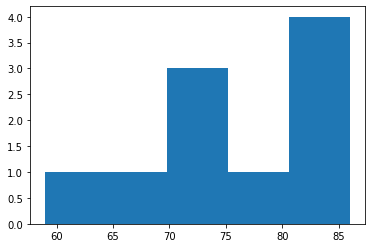

In [ ]:
## p-valor a partir de teste de média com variância desconhecida
df=np.array([65, 74, 78, 86, 59,84, 75, 72, 81, 83])
print(sss.describe(df))
theta=80
nn=len(df)
print(nn)
thetaobs=df.mean()
print(thetaobs)
estimvar=np.var(df,ddof=1)
print(estimvar)
## corresponde fazer um t-test porque a variância da população é desconhecida e deve ser estimada a partir da amostra
tobs=(thetaobs-theta)/(np.sqrt(estimvar/nn))
## tobs tem distribuiçao t com n-1 graus de liberdade
print(tobs)
pvaluet1=sss.t.cdf(tobs,nn-1)
print(pvaluet1)
plt.hist(df,5)
plt.show()


In [ ]:
## o anterior está implementado na função ttest_1samp (ver que o p-valor é igual)
sss.ttest_1samp(df,popmean=80,alternative='less')

Ttest_1sampResult(statistic=-1.5735217944702773, pvalue=0.07502463015017978)

In [ ]:
pvalue3=sss.norm.cdf(tobs,0,1) ##aproximando pela normal (o p-value obtido é diferente, só se a amostra e bem grande coincidem)
print(pvalue3)
pvalue4=sss.norm.cdf(thetaobs,theta,np.sqrt(estimvar/nn))
print(pvalue4)
pvalue5=sss.norm.cdf(df.mean(),theta,np.std(df,ddof=1)/np.sqrt(nn))
print(pvalue5)

0.057799022922622775
0.057799022922622775
0.057799022922622775


Podemos gerar valores com distribuição normal de meia 80 e ver se a média é mais extrema que 75.7 (nesse caso mais extrema significa MENOR, já que a hipótese sendo testada é que "a média valia 80 e diminuiu")

[ 85.52087141  87.23230513  77.7987692   77.13365375  93.4492042
  89.01893098 101.46188042  81.7104567   76.91068266  87.86376527]
DescribeResult(nobs=10, minmax=(76.91068266471007, 101.46188042378999), mean=85.81005197266265, variance=61.71371624106929, skewness=0.5758542223758452, kurtosis=-0.41034515309769537)


(array([4., 1., 3., 1., 1.]),
 array([ 76.91068266,  81.82092222,  86.73116177,  91.64140132,
         96.55164087, 101.46188042]),
 <a list of 5 Patch objects>)

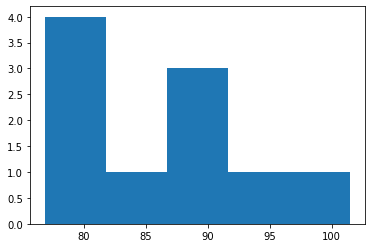

In [ ]:
dfsintetico=np.random.normal(80,np.sqrt(75),10) ##precisamos dizer a variancia dos dados sinteticos
print(dfsintetico)
print(sss.describe(dfsintetico))
## a média deveria ser menor que 75.7 um 7.5% das vezes (vai depender da variancia)
## podemos ver o histograma do dado sintetico para comparar com o do dado real (e verificar normalidade)
plt.hist(dfsintetico,5)

In [ ]:
cont=0
for kk in range(100000):
  dfsintetico=np.random.normal(80,np.sqrt(90),10) ##precisamos dizer a variancia dos dados sinteticos
                    ## quanto meor a variancia especificada, menor a probabilidade da meia < 75.7
  if dfsintetico.mean() < 75.7:
    cont=cont+1
  
print(cont,kk,cont/(kk+1))

7608 99999 0.07608


Médias de 50 clientes foram 62 e 71 (gasto em compras). O desvio padrão é 20 unidades. H0: médias iguais

In [ ]:
z=(62-71)/(20*np.sqrt(2/50))
print(z)
pvaluez=sss.norm.cdf(z)*2
print(pvaluez)

-2.25
0.02444894531008939


In [ ]:
## verificando por simulaçao
cont=0
for kk in range(100000):
  dfsintetico1=np.random.normal(0,20,50) ##colocamos media zero em ambos
  dfsintetico2=np.random.normal(0,20,50)
  if abs(dfsintetico1.mean()-dfsintetico2.mean()) > abs(62-71):
    cont=cont+1
  
print(cont,kk,cont/(kk+1))

2484 99999 0.02484


Tipo X e tipo Y de concreto

In [ ]:
dfx=np.array([54, 55, 58, 50, 61])
print(dfx.mean(),np.std(dfx,ddof=1))
dfy=np.array([51, 54, 55, 52, 53])
print(dfy.mean(),np.std(dfy,ddof=1))
## teste de comparação de médias com duas amostras (não assumimos que as variâncias sejam iguais)
sss.ttest_ind(dfx,dfy,alternative='greater',equal_var=False)

55.6 4.159326868617084
53.0 1.5811388300841898


Ttest_indResult(statistic=1.3065491598369765, pvalue=0.1234239912084517)

In [ ]:
sss.ttest_ind(dfx,dfy,alternative='greater',equal_var=True)


Ttest_indResult(statistic=1.3065491598369765, pvalue=0.11383696170651378)